<div style="background-color:#5D73F2; color:#19180F; font-size:40px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> Support Vector Machines </div>
<div style="background-color:#A8B4F6; color:#19180F; font-size:30px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px"> Overview</div>
<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
Support Vector Machines (SVMs) are powerful machine learning models for classification and regression tasks. They are particularly effective when the data cannot be linearly separated. SVM works by finding the best hyperplane that separates different layers while maximizing layer separation.<br><br>
Imagine you have a set of data points that belong to two different classes, say red circles and blue squares, and they are not linearly separable. The goal of SVM is to find the optimal decision boundary to separate at most two classes while minimizing the risk of misclassification of subsequent data points. To achieve this, SVM uses the concept of support vectors, the data points that are closest to the decision boundary. These support vectors play an important role in determining decision boundaries and delimitation.<br><br>
<b>Mathematics</b><br>
1. Hyperplane:<br>
In SVM, the hyperplane is a decision boundary that divides the data points into different classes. For simplicity, consider the 2D case where each data point is represented by a vector x = (x1, x2) of two functions. The hyperplane can be represented by the equation w⋅x + b = 0, where w is the normal vector of the hyperplane and b is the error term.<br><br>
2. Margin:<br>
The margin is the distance between the hyperplane and the nearest data point of each layer, which is the support vector. The goal of SVM is to find the hyperplane that maximizes this margin. Denote the edge as 2d, where d is the distance between the hyperplane and the support vectors. <br><br>
3. Optimal hyperplane:<br>
The optimal hyperplane is the one that maximizes the margin while correctly classifying the training data. To find this hyperplane, SVM solves an optimization problem. The goal is to minimize ||w||, which represents the magnitude of the normal vector w, with the constraint that each data point corresponds to yi(w⋅xi + b) ≥ 1, where yi is the class label point data xi . <br><br>
4. Soft margin SVM (parameter C):<br>
In some cases, the data may not be fully separated or may contain biases. Soft Margin SVM allows for some misclassification by introducing a distance variable xii for each data point. The optimization problem is modified to minimize ||w|| + Ci, where C is a hyperparameter that balances profit maximization with misclassification tolerance.<br><br>
5. Kernel Tricks:<br>
SVMs can efficiently handle non-linearly separable data using kernel tricks. The kernel function transforms the input functions into a high-dimensional space in which the data can be linearly separated. This transformation allows the SVM to find nonlinear decision constraints in the original feature space without explicitly computing the transformed data.<br><br> 
Commonly used basic functions include:<br>
- Linear kernel: K(x, y) = x⋅y<br>
- Polynomial kernel: K(x, y) = (x⋅y + c)^d<br>
- Radial basis function kernel (RBF): K(x, y) = exp(-γ||x-y||²)<br>
- Sigmoid kernel: K(x, y) = tanh(αx⋅y + c)<br>
<br><br>
With these kernels, SVMs can operate on higher-dimensional object spaces while benefiting from efficient computation in the original object space.<br><br>
In summary, the goal of SVM is to find an optimal hyperplane that maximizes the difference between different classes. They do this by identifying support vectors, which are the data points closest to the decision boundary. SVM uses mathematical optimization techniques to find the best hyperplane and can handle non-linear data using kernel functions.<br><br></div>

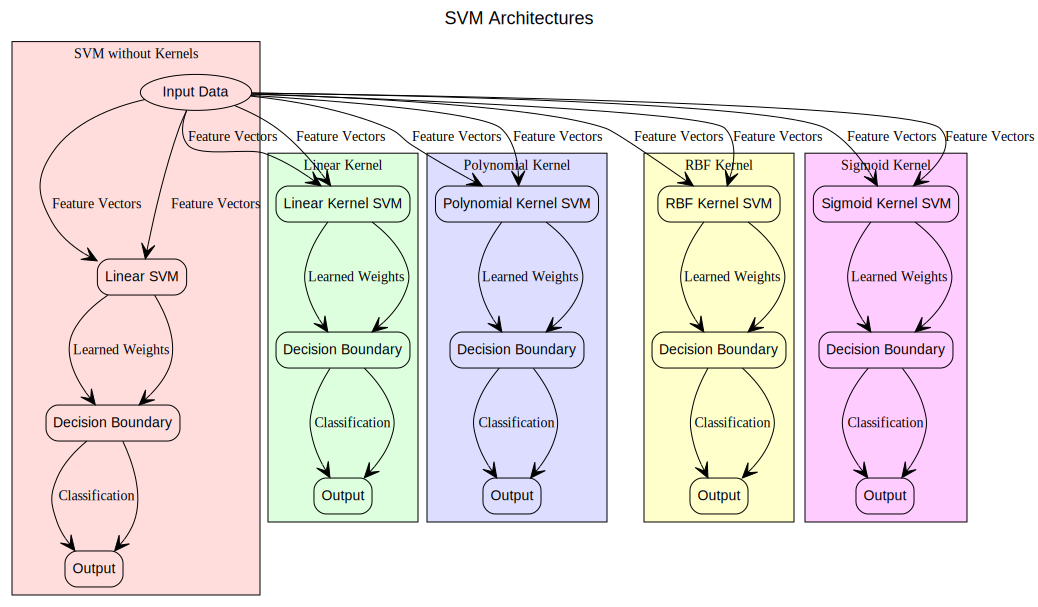

In [1]:
from IPython.display import SVG, display

# Load the SVG file and display it
svg_file = '/kaggle/input/machine-learning-architecture-diagrams/SVM.svg'
display(SVG(filename=svg_file))

<div style="background-color:#D5D9F2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 5px solid #19180F; border-radius:10px">
It shows the architecture of SVM with and without kernels such as linear, polynomial, RBF, and sigmoid kernels. Any architecture consists of his three main components: input data, decision boundaries and outputs.<br><br>
SVMs without Kernels are represented by the "SVMs without Kernels" cluster and show how the feature vectors are processed and used to learn the weights. The learned weights are used to create decision boundaries that separate different classes, and the output represents the classification result.<br><br>
Other clusters represent SVM architectures with different kernel types. Each architecture follows a similar process of transforming feature vectors using specific kernel functions. Then process the transformed data to learn the weights and create the decision boundaries that best separate the classes. Finally, the output represents the classification results.<br><br>
Clusters and nodes are labeled accordingly, and connections between nodes show the data flow and processing steps of each architecture.<br><br></div>

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Installing RapidsAI dependencies</div>


In [2]:
!pip install --upgrade pip
!pip install --upgrade setuptools
!pip install --upgrade wheel

# Add the rapidsai conda channel
!conda config --prepend channels rapidsai

# Install RAPIDS packages
!conda install -y -c rapidsai -c nvidia -c conda-forge cudf cuml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.8.0
    Uninstalling setuptools-59.8.0:
      Successfully uninstalled setuptools-59.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-api 1.17.0 requires importlib-metadata~=6.0.0, but you have importlib-metadata 5.2.0 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.23.5 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.10.1 which is incompatible.
Retrieving notices: ...working... done

# >>>>>>>>>>>>>>>>>>>>>> ERROR REPORT <<<<<<<<<<<<<<<<<<<<<<

    Traceback (most recent call last):
      File "/opt/conda/lib/python3.10/site-packages/conda/gateways/repodata/__init__.py", line 161, in conda_http_errors
   

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Importing modules
    </div>


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cudf
import cupy as cp
from cuml import LinearSVC, SVC
from cuml.preprocessing import StandardScaler
from cuml.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Reading the dataframes and inspecting them    </div>


In [4]:
train_df = pd.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

In [5]:
train_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,2607,243,23,258,7,660,170,251,214,...,0,0,0,0,0,0,0,0,0,3
15116,15117,2603,121,19,633,195,618,249,221,91,...,0,0,0,0,0,0,0,0,0,3
15117,15118,2492,134,25,365,117,335,250,220,83,...,0,0,0,0,0,0,0,0,0,3
15118,15119,2487,167,28,218,101,242,229,237,119,...,0,0,0,0,0,0,0,0,0,3


In [6]:
train_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
test_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [8]:
(train_df.head())


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Performing basic EDA
    </div>


In [9]:
# Perform EDA
(train_df.describe())


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Seperating features and target variable    </div>


In [10]:
X = train_df.drop(['Id', 'Cover_Type'], axis=1)
y = train_df['Cover_Type']


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Checking class distribution    </div>


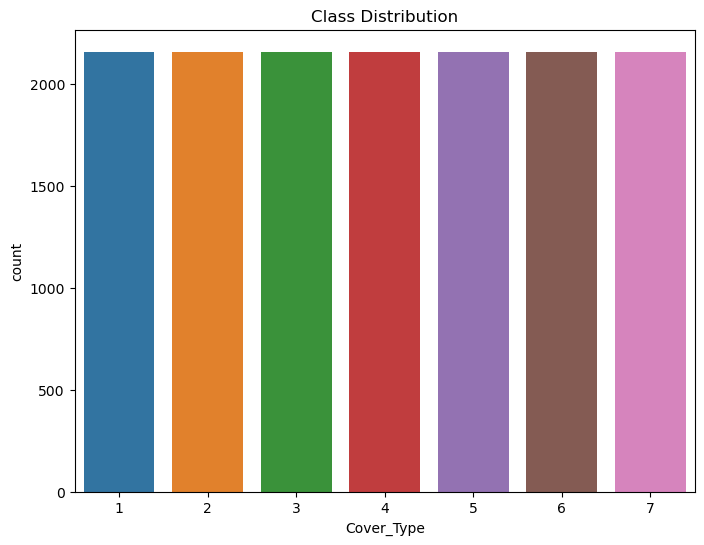

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cover_Type', data=train_df)
plt.title('Class Distribution')
plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Displaying correlation matrix for the significant ones    </div>


/tmp/ipykernel_23/3898616795.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  correlation_matrix_pruned = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))
/tmp/ipykernel_23/3898616795.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix_pruned = correlation_matrix[unique_features].loc[unique_features]
/tmp/ipykernel_23/3898616795.py:18: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix_pruned = correlation_matrix[unique_features].loc[unique_features

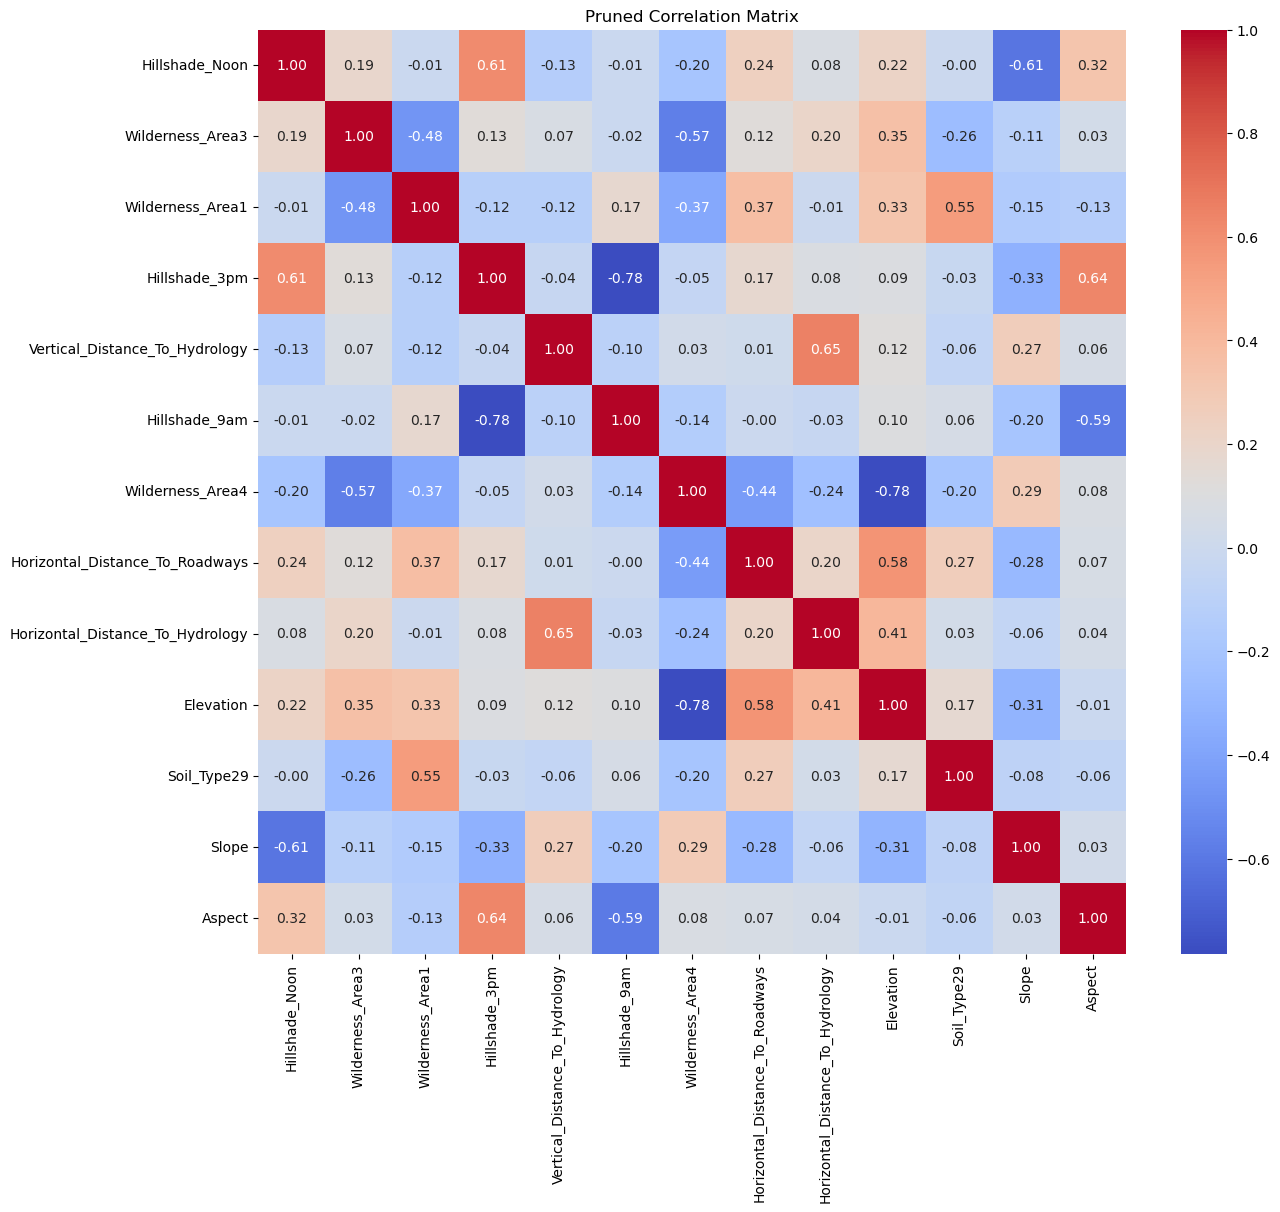

In [12]:
# Calculate correlation matrix
correlation_matrix = train_df.drop(['Id'], axis=1).corr()

# Set a correlation threshold to prune the matrix
threshold = 0.5
correlation_matrix_pruned = correlation_matrix.abs().where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool))

# Find highly correlated features
highly_correlated_features = np.where(correlation_matrix_pruned > threshold)

# Get the unique features
unique_features = set()
for i, j in zip(highly_correlated_features[0], highly_correlated_features[1]):
    unique_features.add(correlation_matrix.columns[i])
    unique_features.add(correlation_matrix.columns[j])

# Create a pruned correlation matrix with highly correlated features
correlation_matrix_pruned = correlation_matrix[unique_features].loc[unique_features]

# Increase the figure size
plt.figure(figsize=(14, 12))

# Plot the pruned correlation matrix
sns.heatmap(correlation_matrix_pruned, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pruned Correlation Matrix')

plt.show()

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Analysing numerical features    </div>


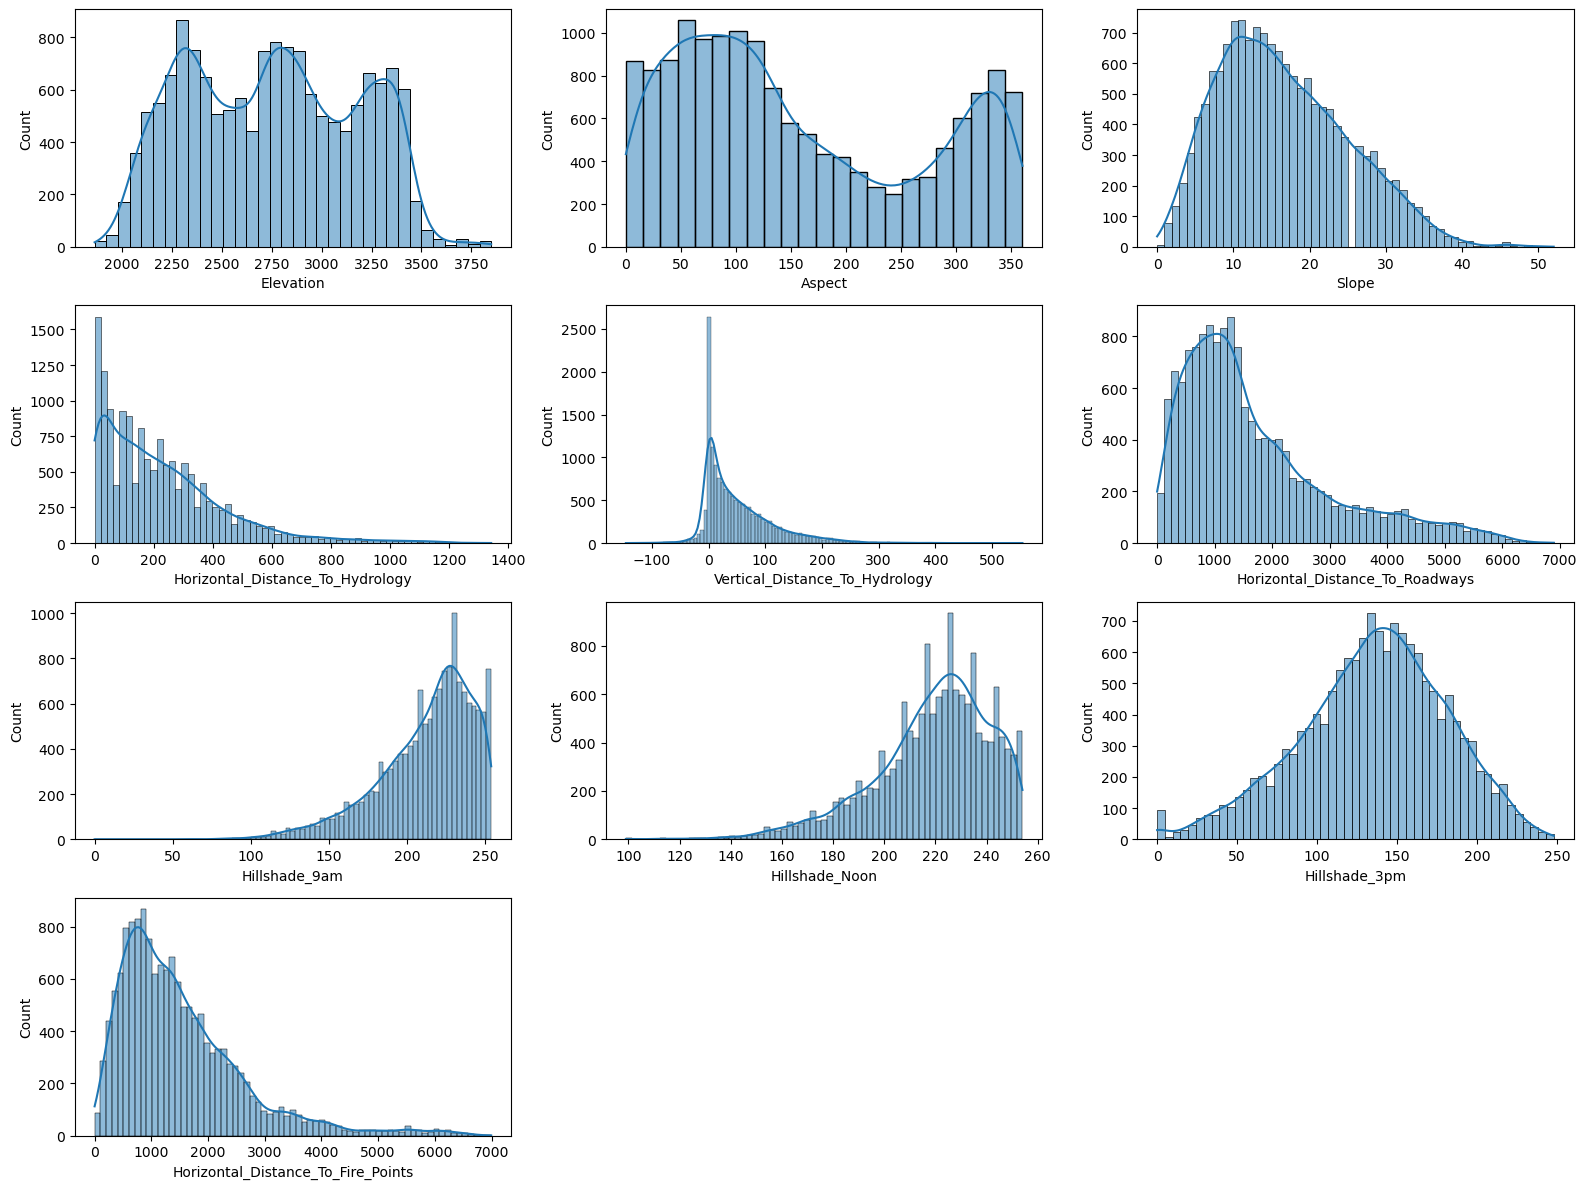

In [13]:
numeric_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
                    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
                    'Horizontal_Distance_To_Fire_Points']

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(train_df[feature], kde=True)
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Analysing categorical features    </div>


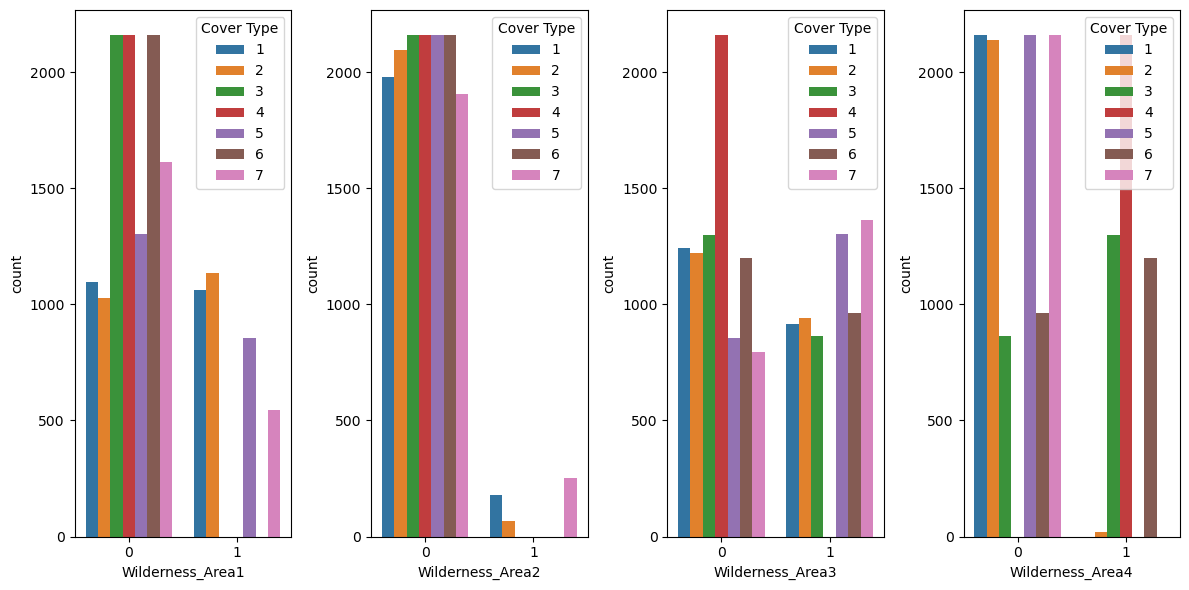

In [14]:
categorical_features = ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4']

plt.figure(figsize=(12, 6))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(x=feature, hue='Cover_Type', data=train_df)
    plt.xlabel(feature)
    plt.legend(title='Cover Type')
plt.tight_layout()
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Splitting the dataset into train and val splits    </div>


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Converting training data to cuDF Dataframe    </div>


In [16]:
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Converting val data to cuDF Dataframe    </div>


In [17]:
X_val_cudf = cudf.DataFrame.from_pandas(X_val)
y_val_cudf = cudf.Series(y_val)

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Converting test data to cuDF Dataframe    </div>


In [18]:
test_features_cudf = cudf.DataFrame.from_pandas(test_df.drop('Id', axis=1))

<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Performing feature scaling    </div>


In [19]:
scaler = StandardScaler()
X_train_scaled_pandas = scaler.fit_transform(X_train_cudf.to_pandas())
X_val_scaled_pandas = scaler.transform(X_val_cudf.to_pandas())
test_features_scaled_pandas = scaler.transform(test_features_cudf.to_pandas())


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Convert the scaled data to CuPy arrays    </div>


In [20]:
X_train_scaled = cp.asarray(X_train_scaled_pandas).astype(cp.float32)
X_val_scaled = cp.asarray(X_val_scaled_pandas).astype(cp.float32)
test_features_scaled = cp.asarray(test_features_scaled_pandas).astype(cp.float32)


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fitting the SVM model using different kernels    </div>


In [21]:
# Define the kernels list
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize the list to store accuracy scores
accuracy_scores = []

# Iterate over different kernels
for kernel in kernels:
    if kernel == 'linear':
        # Use LinearSVC for linear kernel
        svm = LinearSVC()
    else:
        svm = SVC(kernel=kernel)
    
    svm.fit(X_train_scaled, y_train_cudf)

    # Make predictions on the validation set
    val_predictions = svm.predict(X_val_scaled)

    # Convert cuDF Series to NumPy arrays for accuracy calculation
    y_val_np = y_val_cudf.to_arrow().to_numpy()
    val_predictions_np = cp.asnumpy(val_predictions)
    # Calculate accuracy on the validation set
    accuracy = accuracy_score(y_val_np, val_predictions_np)
    accuracy_scores.append(accuracy)
    print(f"Validation Accuracy (Kernel: {kernel}): {accuracy}")


Validation Accuracy (Kernel: linear): 0.6633597883597884
Validation Accuracy (Kernel: poly): 0.7235449735449735
Validation Accuracy (Kernel: rbf): 0.7430555555555556
Validation Accuracy (Kernel: sigmoid): 0.5667989417989417


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Selecting the best kernel based on the highest average accuracy    </div>


In [22]:
# Find the index of the best kernel
best_kernel_index = np.argmax(accuracy_scores)
best_kernel = kernels[best_kernel_index]
print(f"Best Kernel: {best_kernel}")


Best Kernel: rbf


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Plotting accuracy score for each kernels
</div>


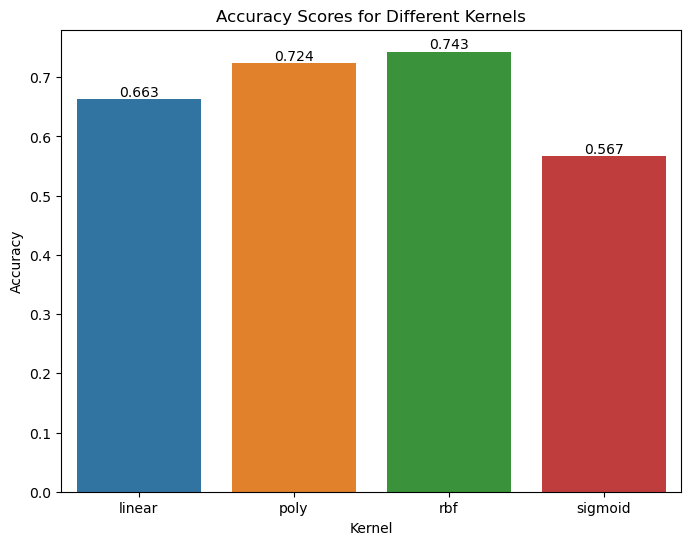

In [23]:
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=kernels, y=accuracy_scores)
plt.title('Accuracy Scores for Different Kernels')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')

# Display accuracy values over each bar
for index, value in enumerate(accuracy_scores):
    barplot.text(index, value, f'{value:.3f}', ha='center', va='bottom')

plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Calculating feature importances via RandomForest Classifier</div>


In [24]:
# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Fit the model
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [25]:
# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_features = X.columns[sorted_indices]


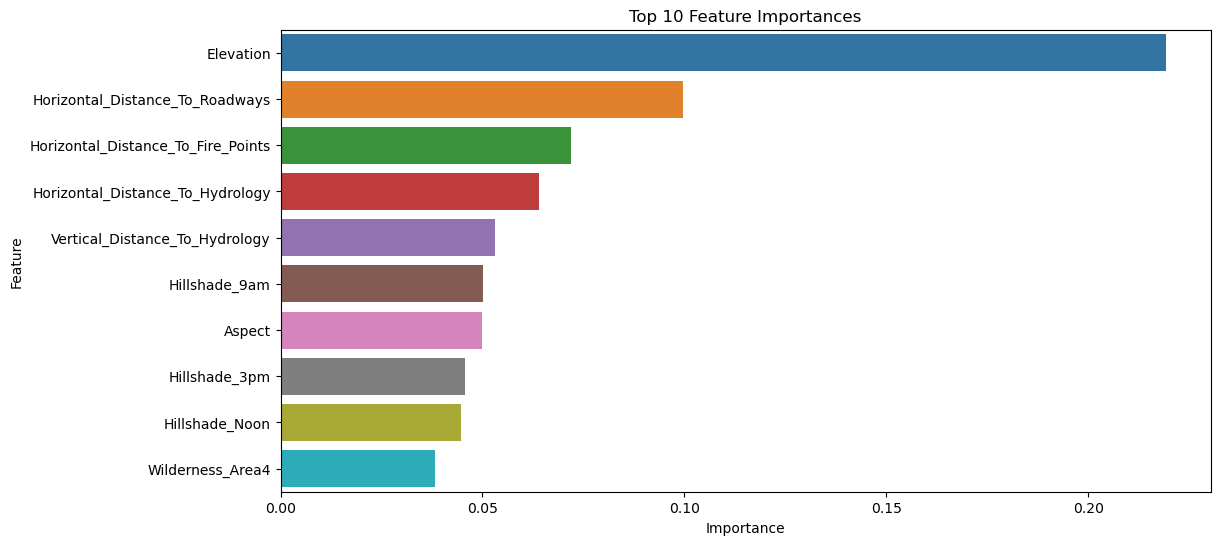

In [26]:
# Number of top features to display
top_n = 10

# Get top feature importances and corresponding feature names
top_importances = importances[sorted_indices][:top_n]
top_features = sorted_features[:top_n]

# Plot top feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title(f'Top {top_n} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Fitting the best kernel of SVM model for generating predictions</div>


In [27]:
# Fit the model with the best kernel
if best_kernel == 'linear':
    svm = LinearSVC()
else:
    svm = SVC(kernel=best_kernel)
    
svm.fit(X_train_scaled, y_train_cudf)


SVC()

In [28]:
# Make predictions on the test set
test_predictions = svm.predict(test_features_scaled)


In [29]:
# Convert the predictions to NumPy array
test_predictions_np = cp.asnumpy(test_predictions)#.to_array()


In [30]:
# Create submission file
submission_df = pd.DataFrame({'Id': test_df['Id'], 'Cover_Type': test_predictions_np})
submission_df.to_csv('submission.csv', index=False)

In [31]:
submission_df

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2
...,...,...
565887,581008,3
565888,581009,3
565889,581010,3
565890,581011,3


<div style="background-color:#F0E3D2; color:#19180F; font-size:15px; font-family:Verdana; padding:10px; border: 2px solid #19180F; border-radius:10px"> 
📌
Please Note: We have exclusively used SVMs to generate predictions for this playground competition to illustrate its performance. Trees based models may perform better</div>
